In [2]:
#Import library numpy, pandas dan scikit-learn
import numpy as np
import pandas as pd
from sklearn import tree

In [3]:
#Membaca Dataset dari File ke Pandas dataFrame
glassDataset = pd.read_csv('glass.csv', delimiter=';', header=0)

In [ ]:
print(glassDataset)

In [5]:
glassDataset.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,152.101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,151.761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,151.618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,151.766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,151.742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Karena Sudah berbentuk Unique-Integer Jadi tidak perlu dirubah Class/Label-nya**

In [ ]:
#Mengubah kelas (kolom "Type_of_Glass") dari String ke Unique-Integer
#glassDataset["Type_of_glass"] = pd.factorize(glassDataset.Type_of_glass)[0]

In [6]:
#Menghapus kolom "Id"
glassDataset = glassDataset.drop(labels="ID", axis=1)

In [ ]:
print(glassDataset)

In [8]:
#Mengubah dataFrame ke array Numpy
glassDataset = glassDataset.to_numpy()

In [9]:
#Membagi Dataset => 100 baris data untuk training dan 20 baris data untuk testing
dataTraining = np.concatenate((glassDataset[0:50, :], glassDataset[60:110, :]), 
                              axis=0)
dataTesting = np.concatenate((glassDataset[50:60, :], glassDataset[110:120, :]), 
                             axis=0)


In [ ]:
print(dataTraining)
len(dataTraining)

In [11]:
#Memecah Dataset ke Input dan Label
inputTraining = dataTraining[:, 0:9]
inputTesting = dataTesting[:, 0:9]
labelTraining = dataTraining[:, 9]
labelTesting = dataTesting[:, 9]

In [12]:
print(labelTesting)
len(labelTesting)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


20

In [13]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [14]:
#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [15]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Hasil Prediksi :  [1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2.]


In [16]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 10 data
Prediksi Salah : 10 data
Akurasi : 50.0 %


#  Decision Tree

[Text(0.5666666666666667, 0.9285714285714286, 'x[3] <= 1.42\ngini = 0.48\nsamples = 100\nvalue = [60, 40]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[2] <= 3.3\ngini = 0.298\nsamples = 66\nvalue = [54, 12]'),
 Text(0.26666666666666666, 0.6428571428571429, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.4, 0.6428571428571429, 'x[5] <= 0.63\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.26666666666666666, 0.5, 'x[8] <= 0.31\ngini = 0.074\nsamples = 52\nvalue = [50, 2]'),
 Text(0.2, 0.35714285714285715, 'x[6] <= 8.005\ngini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(0.13333333333333333, 0.21428571428571427, 'x[2] <= 3.56\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 49\nvalue = [49, 0]'),
 Text(0.3333333333333333, 0.35714285714285

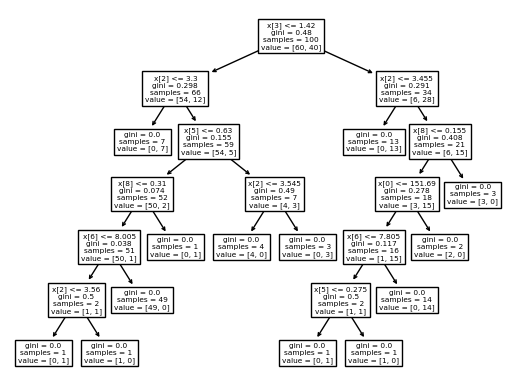

In [17]:
tree.plot_tree(model)

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(inputTraining, labelTraining)

# Export the trained decision tree to a DOT file
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names= glassDataset.feature_names,  
                           class_names= glassDataset.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Save the decision tree as a PNG image
graph.format = 'png'
graph.render('glass_decision_tree', view=True)

AttributeError: ignored